In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib.pyplot as plt
import seaborn as sns
import contextily
import plotly.express as px
from sklearn.preprocessing import robust_scale


In [3]:
df = gpd.read_file('/Users/Safia/code/Safiaaaaa/YouthInTheCity/raw_data/output_maps/merged_bez.shp')
df.dropna(inplace=True)

In [4]:
df = df.rename(
    columns={
        'BEZ': 'Bezirk',
        'child_pov': 'Child poverty',
        'mig_rate': 'Migration rate',
        'unemployme': 'Unemployment',
        'welfare': 'Social benefits',
        'ave_rent': 'Average rent',
        'social_hou': 'Social housing',
        'public_hou': 'Public housing'
    })

In [5]:
df.Bezirk = df.Bezirk.map({
    '01': 'Mitte',
    '02': 'Friedrichshain-Kreuzberg',
    '03': 'Pankow',
    '04': 'Charlottenburg-Wilmersdorf',
    '05': 'Spandau',
    '06': 'Steglitz-Zehlendorf',
    '07': 'Tempelhof-Schöneberg',
    '08': 'Neukölln',
    '09': 'Treptow-Köpenick',
    '10': 'Marzahn-Hellersdorf',
    '11': 'Lichtenberg',
    '12': 'Reinickendorf'
})

<Figure size 432x288 with 0 Axes>

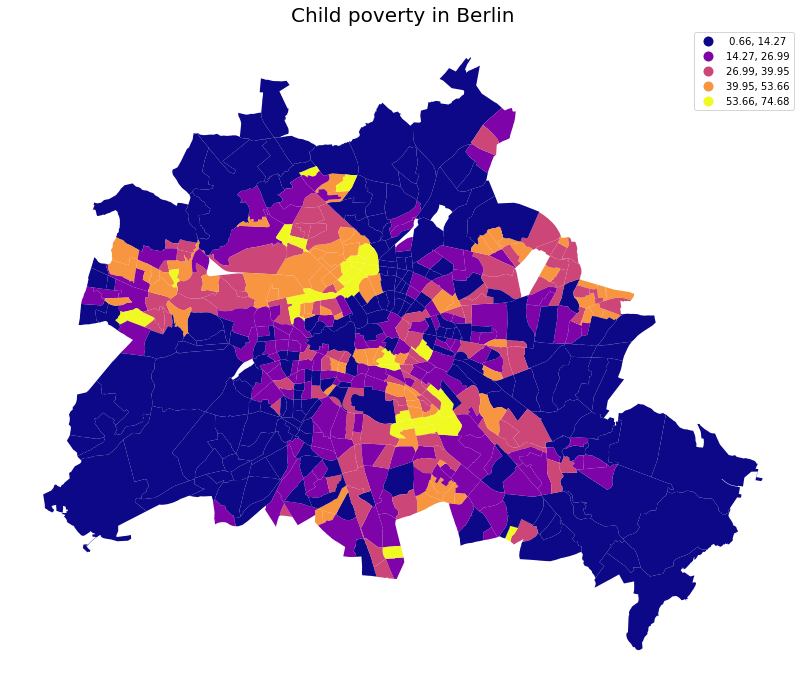

In [16]:
fig = plt.figure()
ax = df.plot(figsize=(18,12), column='Child poverty', cmap='plasma', scheme='NaturalBreaks', legend=True)
ax.set_title('Child poverty in Berlin', fontsize=20)
ax.axis('off')
fig.tight_layout()
plt.savefig(fname='../child_pov.png',transparent=False, facecolor='white')

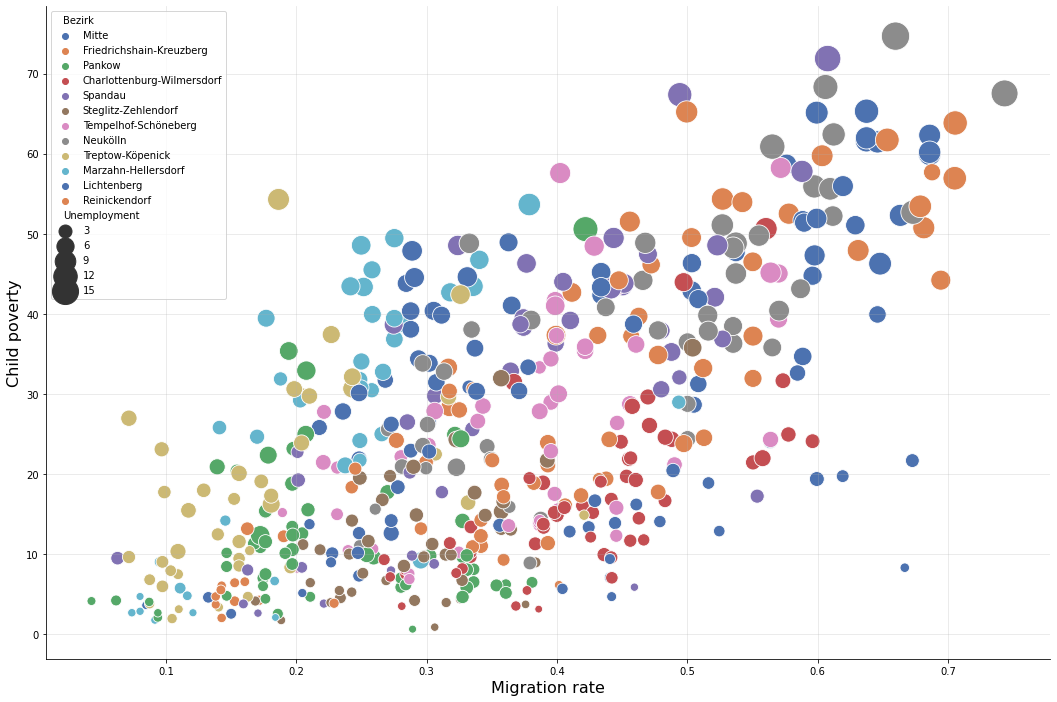

In [6]:
fig = plt.figure(figsize=(18, 12))
ax = sns.scatterplot(x="Migration rate",
                y="Child poverty",
                hue='Bezirk',
                size="Unemployment",
                hue_order=[
                    'Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
                    'Charlottenburg-Wilmersdorf', 'Spandau',
                    'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg', 'Neukölln',
                    'Treptow-Köpenick', 'Marzahn-Hellersdorf', 'Lichtenberg',
                    'Reinickendorf'
                ],
                palette=sns.color_palette('deep', 12),
                sizes=(60, 800), legend='brief',
                data=df)
ax.grid(alpha=0.3)
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
ax.set_xlabel('Migration rate', fontsize = 16)
ax.set_ylabel('Child poverty', fontsize = 16)
plt.savefig(fname='plots/scatterplot_mig_rate.svg',transparent=False)

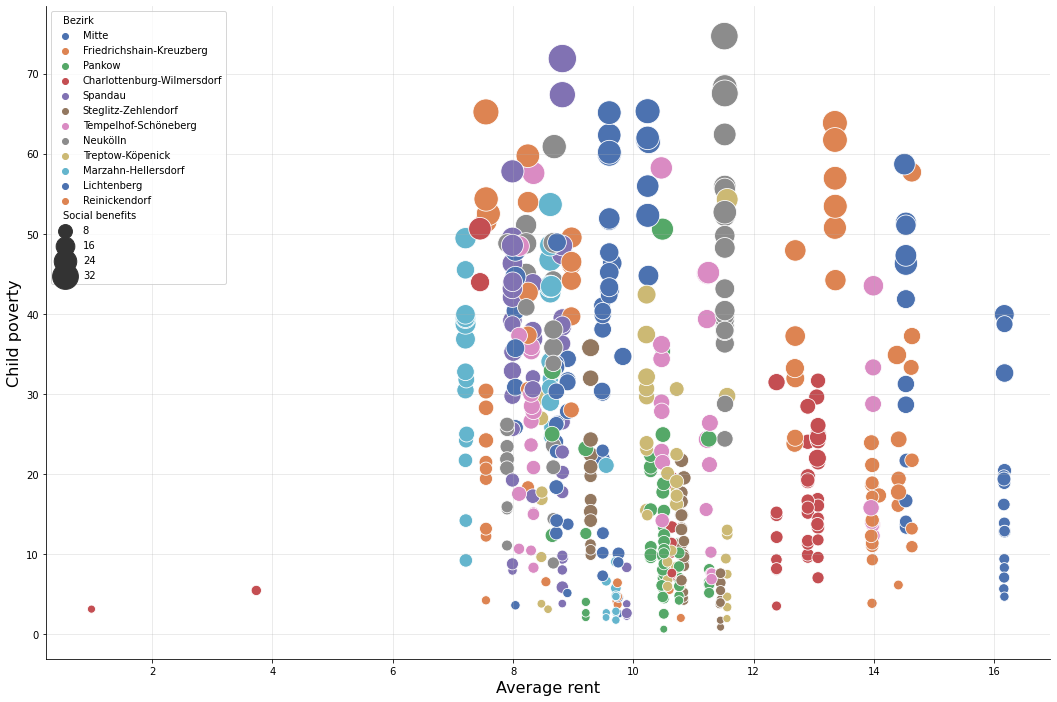

In [7]:
fig = plt.figure(figsize=(18, 12))
ax = sns.scatterplot(x="Average rent",
                y="Child poverty",
                hue='Bezirk',
                size="Social benefits",
                hue_order=[
                    'Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
                    'Charlottenburg-Wilmersdorf', 'Spandau',
                    'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg', 'Neukölln',
                    'Treptow-Köpenick', 'Marzahn-Hellersdorf', 'Lichtenberg',
                    'Reinickendorf'
                ],
                palette=sns.color_palette('deep', 12),
                sizes=(60, 800), legend='brief',
                data=df)
ax.grid(alpha=0.3)
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
ax.set_xlabel('Average rent', fontsize = 16)
ax.set_ylabel('Child poverty', fontsize = 16)
plt.savefig(fname='plots/scatterplot_avg_rent.svg',transparent=False)

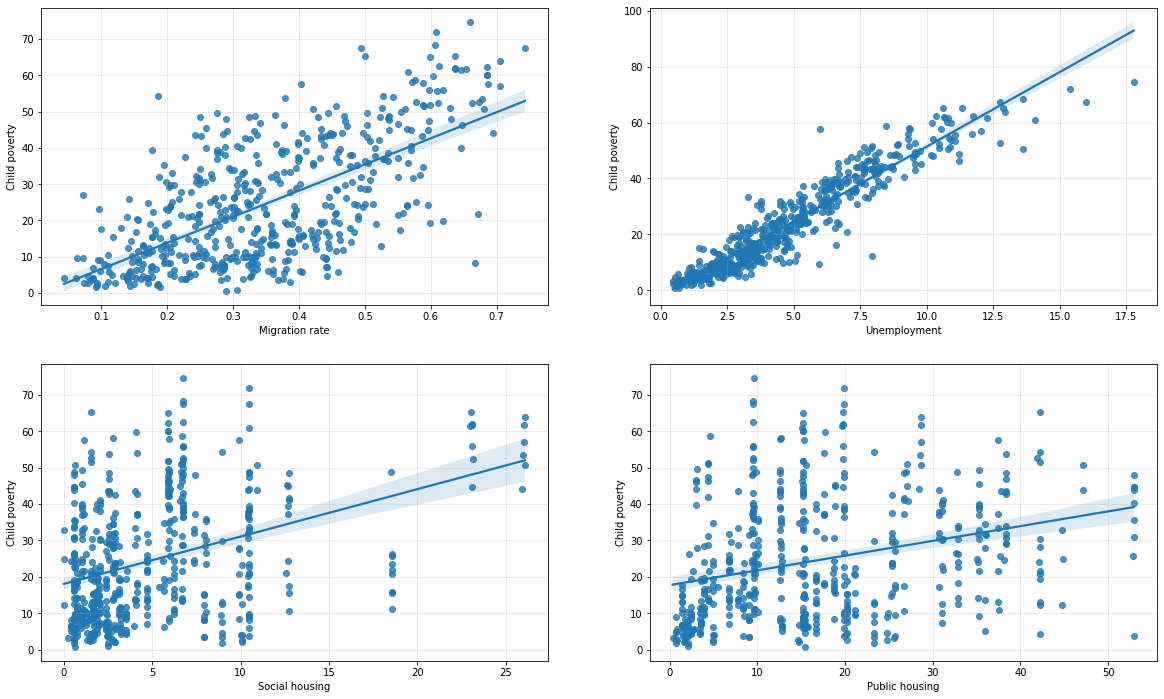

In [37]:
fig=plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.regplot(df['Migration rate'], df['Child poverty'], fit_reg=True)
ax1.grid(alpha=0.3)

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.regplot(df['Unemployment'], df['Child poverty'], fit_reg=True)
ax2.grid(alpha=0.3)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.regplot(df['Social housing'], df['Child poverty'], fit_reg=True)
ax3.grid(alpha=0.3)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.regplot(df['Public housing'], df['Child poverty'], fit_reg=True)
ax4.grid(alpha=0.3)

plt.savefig(fname='plots/mrate_unempl_social_public.svg',transparent=False)


<AxesSubplot:>

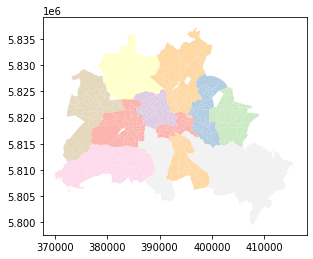

In [45]:
df.plot(column='Bezirk', cmap='Pastel1')

In [11]:
df = gpd.read_file('../YouthInTheCity/data/cluster_gdf.shp')

In [12]:
clustering = df[['PLR_ID','child_pov','mig_rate', 'unemployme', 'welfare',
                 'culture', 'stations', 'kita', 'Gymnasium', 'outdoor_fa', 'outdoor_le',
    'vegpm20', 'social_hou', 'public_hou', 'geometry']]

In [13]:
columns = ['child_pov','mig_rate', 'unemployme', 'welfare',
                 'culture', 'stations', 'kita', 'Gymnasium', 'outdoor_fa', 'outdoor_le',
    'vegpm20', 'social_hou', 'public_hou']

In [14]:
for c in columns:
    clustering[c] = robust_scale(clustering[c])

/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/geodataframe.py:14

In [110]:
migration = ['mig_rate', 'child_pov']

In [15]:
infrastructure = [
    'culture', 'stations', 'kita', 'Gymnasium', 'outdoor_fa', 'outdoor_le',
    'vegpm20', 'social_hou', 'public_hou'
]

In [112]:
social_index = ['unemployme', 'welfare']

In [113]:
social_index_mig = ['unemployme', 'welfare','mig_rate', 'child_pov']

In [19]:
k5cls.labels_

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,

/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


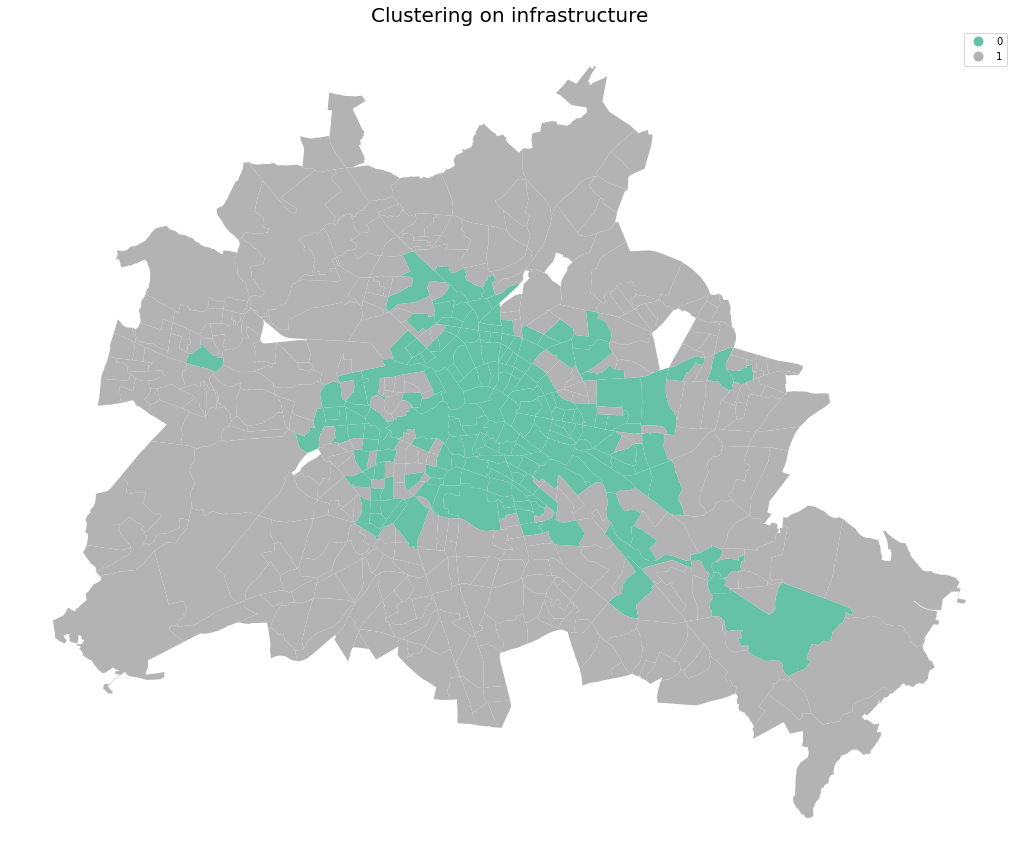

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(clustering[infrastructure])
# Assign labels into a column
clustering['cluster'] = k5cls.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(18,18))
clustering.plot(
    column="cluster", categorical=True, legend=True, linewidth=0, ax=ax, cmap='Set2'
)

# Remove axis
ax.set_axis_off()
ax.set_title("Clustering on infrastructure", fontsize=20)
# Display the map
#plt.savefig(fname='plots/cluster_infrastructure.svg',facecolor='white')

plt.show()

In [204]:
k5means = clustering.groupby("cluster")[social_index_mig].mean()
k5means.rename({})
k5means.T.round(3)

cluster,0,1,2,3
unemployme,-0.563,1.604,-0.089,0.696
welfare,-0.472,1.633,-0.040,0.729
mig_rate,-0.626,1.213,0.147,0.299
child_pov,-0.458,1.259,-0.082,0.631


In [129]:
#k5means.to_csv('../raw_data/cluster_values.csv')

In [197]:
clustering.to_csv('../raw_data/cluster_plr_id.csv')

In [215]:
clust_df = clustering.groupby("cluster")[social_index_mig].mean().T.round(2)

In [216]:
clust_df

cluster,0,1,2,3
unemployme,-0.56,1.60,-0.09,0.70
welfare,-0.47,1.63,-0.04,0.73
mig_rate,-0.63,1.21,0.15,0.30
child_pov,-0.46,1.26,-0.08,0.63


In [214]:
clust_df.columns = list(clustering['clusters'].unique())

In [217]:
clust_df.columns = ['high social status, low migration rate','very low social status, very high migration rate',
                    'average social status, average migration rate', 'average/low social status, average/high migration rate']

In [218]:
clust_df

,"high social status, low migration rate","very low social status, very high migration rate","average social status, average migration rate","average/low social status, average/high migration rate"
unemployme,-0.56,1.60,-0.09,0.70
welfare,-0.47,1.63,-0.04,0.73
mig_rate,-0.63,1.21,0.15,0.30
child_pov,-0.46,1.26,-0.08,0.63


In [219]:
clust_df.index = ind

In [210]:
clust_df.columns = list(clustering['clusters'].unique())

In [207]:

clustering['clusters'] = clustering.cluster.map({
    0:'high social status, low migration rate',
    1: 'very low social status, very high migration rate',
        2: 'average social status, average migration rate',
    3: 'average/low social status, average/high migration rate'
})



/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [220]:
clustering

,"high social status, low migration rate","very low social status, very high migration rate","average social status, average migration rate","average/low social status, average/high migration rate"
unemployement,-0.56,1.60,-0.09,0.70
welfare,-0.47,1.63,-0.04,0.73
migration,-0.63,1.21,0.15,0.30
child poverty,-0.46,1.26,-0.08,0.63


In [222]:
clust_df.to_csv('../raw_data/cluster_values.csv')

In [228]:
clustering[['PLR_ID', 'cluster', 'clusters']].to_csv('../raw_data/cluster_labels.csv')

In [ ]:
clustering.drop(colums= )

In [118]:
df['cluster'] = clustering.cluster

In [146]:
d = df.groupby("cluster")[social_index_mig].mean().T.round(2)


In [181]:
list(clustering['clusters'].unique())

['high social index, low migration rate',
 'somewhat low social index, average migration rate',
 'average social index, average migration rate',
 'very low social index, very high migration rate']

In [148]:
d.columns = list(clustering['clusters'].unique())

In [199]:
ind = ['unemployement', 'welfare', 'migration', 'child poverty']

In [200]:
clust_df.index = ind

In [201]:
clust_df

,"high social status, low migration rate","average/low social status, average/high migration rate","average social status, average migration rate","very low social status, very high migration rate"
unemployement,-0.56,1.60,-0.09,0.70
welfare,-0.47,1.63,-0.04,0.73
migration,-0.63,1.21,0.15,0.30
child poverty,-0.46,1.26,-0.08,0.63


In [155]:
d['feat'] = ind

In [157]:
d.set_index('Feature', inplace=True)

In [159]:
d.drop(columns='feat', inplace=True)


In [161]:
d.index.name=None
d

,"high social index, low migration rate","somewhat low social index, average migration rate","average social index, average migration rate","very low social index, very high migration rate"
unemployement,2.24,10.59,4.06,7.09
welfare,4.38,24.79,8.57,16.03
migration,0.20,0.59,0.36,0.40
child poverty,8.73,55.22,18.91,38.21


In [176]:
clustering

,PLR_ID,child_pov,mig_rate,unemployme,welfare,culture,stations,kita,Gymnasium,outdoor_fa,outdoor_le,vegpm20,social_hou,public_hou,geometry,cluster,clusters
0,11501341,-0.685012,-0.862932,-0.675746,-0.683166,0.2,1.000000,0.045455,-1.0,0.678201,0.250,0.328747,-0.362625,0.615790,"POLYGON ((399848.954 5815619.506, 399854.727 5...",0,"high social index,\nlow migration rate"
1,3701659,-0.480007,0.012697,-0.434501,-0.412993,2.2,1.500000,1.272727,0.0,0.027682,0.500,0.014784,-0.542303,-0.153677,"POLYGON ((393175.012 5821135.577, 393167.174 5...",0,"high social index,\nlow migration rate"
2,7601340,0.759258,0.307552,0.600519,0.913122,0.0,-0.666667,-0.090909,-1.0,-0.844291,0.000,-0.123797,1.886450,0.736963,"POLYGON ((388394.110 5807792.070, 388379.276 5...",3,"somewhat low social index, average migration rate"
3,2500831,0.000923,0.280808,0.130999,0.092292,1.2,1.500000,1.000000,1.0,0.657439,1.000,-0.091353,-0.473457,-0.434519,"POLYGON ((396010.552 5819339.570, 396021.567 5...",2,"average social index, average migration rate"
4,12601134,1.123095,0.576892,1.280156,1.462748,-0.2,-0.333333,0.227273,0.0,-0.283737,2.250,0.555369,-0.311928,1.725959,"POLYGON ((387367.428 5828619.763, 387315.862 5...",1,"very low social index, \n very high migration ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,12500927,-0.016068,-0.414595,-0.338521,-0.195411,-0.2,0.000000,0.363636,1.0,-0.449827,0.375,1.318079,-0.311928,1.725959,"POLYGON ((387280.650 5828614.114, 387266.882 5...",0,"high social index,\nlow migration rate"
532,3200204,-0.623696,-1.278398,-0.667964,-0.648105,-0.2,-0.333333,-0.545455,-1.0,-0.352941,0.250,0.291265,0.013022,-0.747920,"POLYGON ((392586.179 5829994.574, 392586.626 5...",0,"high social index,\nlow migration rate"
533,10400941,-0.673562,-1.191765,-0.979248,-0.746069,0.0,1.333333,-0.318182,-1.0,-0.560554,-0.250,-0.178086,-0.510876,-0.920621,"POLYGON ((406064.851 5815581.891, 406061.455 5...",0,"high social index,\nlow migration rate"
534,8100101,0.712716,1.115910,1.230869,1.058520,3.4,-0.166667,1.272727,0.0,1.494810,-0.625,1.913762,0.706392,-0.359338,"POLYGON ((391887.140 5816592.598, 391898.686 5...",1,"very low social index, \n very high migration ..."


In [133]:
columns = clustering['clusters']

In [130]:
clustering.to_csv('../raw_data/clusters.csv')